In [1]:
!pip install mplstereonet


In [2]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math

In [3]:
def generate_line(a,b,c,d,e):

  def line(t):
    return (a*t + c, b*t + d)

  t = np.linspace(0, 1, e)

  return np.array([line(i) for i in t])

def generate_grid(a,b,c,d,e):
  x = np.linspace(a, b, e)
  y = np.linspace(c, d, e)
  return np.meshgrid(x, y)

In [19]:
def get_functions(x_amplitude, x_angle, x_wavelength, y_amplitude, y_angle, y_wavelength):

  def bed(x,y):
    return x_amplitude*math.cos((2*math.pi/x_wavelength) * ( x*math.sin(x_angle) + y*math.cos(x_angle))) + y_amplitude*math.cos((2*math.pi/y_wavelength) * (x*math.sin(y_angle) + y*math.cos(y_angle)))

  def bedding_pole(x,y):
    df_dx = (-x_amplitude*(math.sin(x_angle)*2*math.pi/x_wavelength)*math.sin((2*math.pi/x_wavelength) * ( x*math.sin(x_angle) + y*math.cos(x_angle))) +
            y_amplitude*(math.cos(y_angle)*2*math.pi/y_wavelength)*math.sin((2*math.pi/y_wavelength) * ( x*math.sin(y_angle) + y*math.cos(y_angle))) )
    df_dy = (-x_amplitude*(math.cos(x_angle)*2*math.pi/x_wavelength)*math.sin((2*math.pi/x_wavelength) * ( x*math.sin(x_angle) + y*math.cos(x_angle))) +
            y_amplitude*(math.sin(y_angle)*2*math.pi/y_wavelength)*math.sin((2*math.pi/y_wavelength) * ( x*math.sin(y_angle) + y*math.cos(y_angle))) )

    try:
      plunge = 180/math.pi * math.atan(1/(df_dx**2 + df_dy**2))
    except ZeroDivisionError:
      plunge = 90

    trend = (90 - (180/math.pi * math.atan2(df_dy, df_dx))) % 360
    return plunge, trend

  return bed, bedding_pole



def plot_2d(L, bed):
  x = np.linspace(-2, 2, 101)
  y = np.linspace(-2, 2, 101)
  z = np.array([bed(i,j) for j in y for i in x])

  X, Y = np.meshgrid(x, y)
  Z = z.reshape(101, 101)

  plt.pcolor(X, Y, Z)
  plt.set_cmap('magma')

  for n, i in enumerate(L):
    plt.plot(i[:, 0], i[:, 1], color=list(col.TABLEAU_COLORS.values())[n%len(col.TABLEAU_COLORS)])

  #plt.xlim(-2, 2)
  #plt.ylim(-2, 2)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.colorbar()

  ax = plt.gca()
  ax.set_aspect('equal', adjustable='box')

  plt.show()

def plot_2d_grid(G, bed):
  x = np.linspace(-2, 2, 101)
  y = np.linspace(-2, 2, 101)
  z = np.array([bed(i,j) for j in y for i in x])

  X, Y = np.meshgrid(x, y)
  Z = z.reshape(101, 101)

  plt.pcolor(X, Y, Z)
  plt.set_cmap('magma')

  plt.plot(*G, linestyle='none', marker='o', color='#88aaff', ms=1)

  plt.xlabel('Easting / km')
  plt.ylabel('Northing / km')
  
  cbar = plt.colorbar()
  cbar.set_label('Altitude / km', rotation=270)


  ax = plt.gca()
  ax.set_aspect('equal', adjustable='box')

  plt.show()


In [5]:
def plot_3d(L, bed):
  x = np.linspace(-2, 2, 101)
  y = np.linspace(-2, 2, 101)
  z = np.array([bed(i,j) for j in y for i in x])

  X, Y = np.meshgrid(x, y)
  Z = z.reshape(101, 101)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none')

  for n, j in enumerate(L):
    line_z = np.array([bed(*i) for i in j])
    ax.plot(j[:, 0], j[:, 1], zs=line_z, color=list(col.TABLEAU_COLORS.values())[n%len(col.TABLEAU_COLORS)])

  plt.xlabel('Easting / km')
  plt.ylabel('Northing / km')
  ax.set_zlabel('Altitude / km')
  #fig.colorbar(surf)

  ax.set_zlim(-0.51, 0.51)
  ax.set_aspect('equal')

  ax.view_init(60,240)


  ax.set_box_aspect(None, zoom=0.85)



  plt.show()

In [6]:
def get_poles(L, bedding_pole):
  return [np.array([bedding_pole(*i) for i in j]) for j in L]



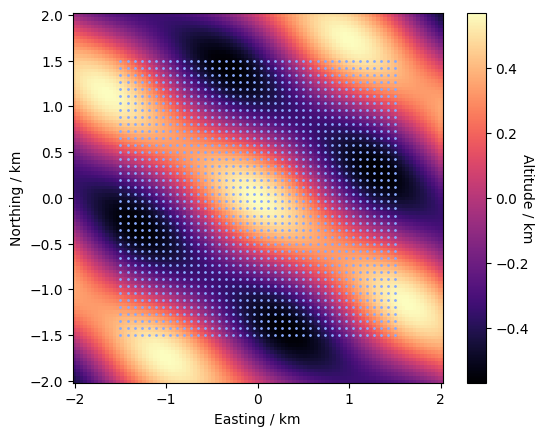

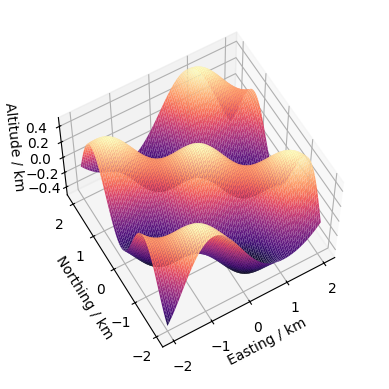

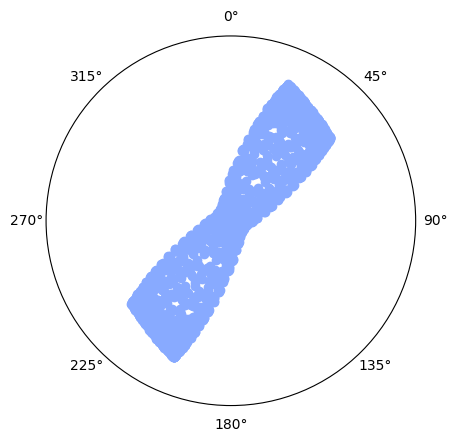

In [20]:
#L = [generate_line(0.65,0.11,-0.4,1.1, 101), generate_line(0.7,-0.45, 0.25, 1.21, 41)]
#L = [generate_line(0.4, 0.4, 0.1, 0.8, 101), generate_line(0.64,-0.36,-1.6,-0.19, 41)]
G = generate_grid(-1.5, 1.5, -1.5, 1.5, 40)
bed, bedding_pole = get_functions(0.45, 35/180*math.pi, 2, 0.12, -60*1/180*math.pi, 2)

#plot_2d(L, bed)
plot_2d_grid(G,bed)
plot_3d([], bed)

poles = get_poles([], bedding_pole)

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

for i in np.stack(G,axis=2):
  for j in i:
    ax.line(*bedding_pole(*j), color='#88aaff')

for n, line in enumerate(poles):
  for pole in line:
    ax.line(*pole, color=list(col.TABLEAU_COLORS.values())[n%len(col.TABLEAU_COLORS)])

plt.show()